Plotting Puerto Rico's median monthly nightlight (2012 ~)

In [1]:
# Import libraries
import warnings
warnings.filterwarnings('ignore')

import os
import urllib.request

import pandas as pd

import matplotlib.pyplot as plt

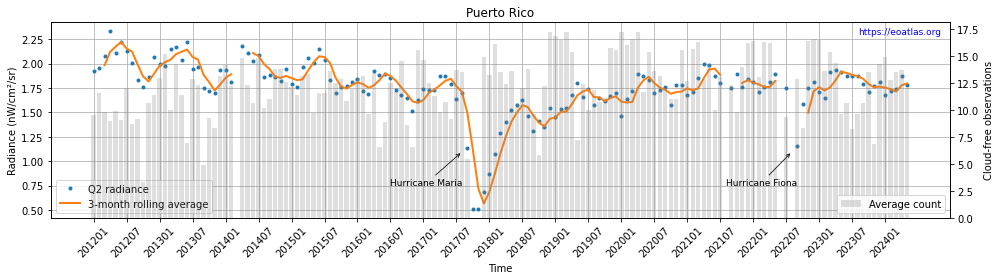

In [3]:
# path setting
url = 'https://eoatlas-nightlight.s3.amazonaws.com/eoatlas-monthly-nightlight-00329.csv' # Puerto Rico
filename = os.path.basename(url)


# parameters
col = 'q2' # column name
N = 3 # N-month rolling average


# download data
urllib.request.urlretrieve(url, filename)

# load data
df = pd.read_csv(filename)

# clean up
os.remove(filename)

# xtick labels
x = [f"{y}{m:02d}" for y, m in zip(df.year.values, df.month.values)]

# plot
fig, ax1 = plt.subplots(1, 1, figsize=(14, 4))
ax1.plot(x, df[col], '.', linewidth=1.0, label=f"{col.capitalize()} radiance")

# plot smoothed data
ax1.plot(
    x, 
    df[col].rolling(window=N).mean(), 
    '-', 
    linewidth=2.0, 
    label=f"{N}-month rolling average"
)

# plot cloudFree
ax2 = ax1.twinx()
ax2.bar(
    x, 
    df['cloudFree'], 
    color='gray', 
    alpha=0.25, 
    label=f"Average count"
)

# figure title
ax1.set_title(f"{df.shapeName.unique()[0]}")

# x label
ax1.set_xlabel("Time")

# y labels
ax1.set_ylabel(f"Radiance ({df.unit.unique()[0]})")
ax2.set_ylabel("Cloud-free observations")

# x ticks
ax1.set_xticks(ax1.get_xticks()[::6])
ax1.tick_params(axis='x', labelrotation=45)

# legend
ax1.legend(loc='lower left', ncols=1)
ax2.legend(loc='lower right')

# grid
ax1.grid()

# annotations

# watermark
plt.annotate(
    "https://eoatlas.org",
    fontsize=9,
    xy=(139, 17),
    xycoords='data',
    color='blue',
)


# Hurricane Maria
plt.annotate(
    'Hurricane Maria',
    fontsize=9,
    xy=(67, 6.1),
    xycoords='data',
    xytext=(54, 3),
    textcoords='data',
    arrowprops=dict(arrowstyle= '->',
                     color='black',
                     lw=0.75,
                     ls='-')
           )

# Hurricane Fiona
plt.annotate(
    'Hurricane Fiona',
    fontsize=9,
    xy=(127, 6.1),
    xycoords='data',
    xytext=(115, 3),
    textcoords='data',
    arrowprops=dict(arrowstyle= '->',
                     color='black',
                     lw=0.75,
                     ls='-')
           )


fig.tight_layout()

# plt.savefig("../assets/readme-header.png", dpi=200)

plt.show()